In [18]:
# import necessary packages

import imageio
import scipy.ndimage as ndi
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [31]:
'''----------------------------------------------------------------------------------------
Load and extract image data from the .nii files
-------------------------------------------------------------------------------------------
'''
# the path of a T1-weighted brain .nii image
p = "data/BRAIN.nii"
d = nib.load(p)

# access to the numpy array
im1 = d.get_fdata().T
im = d.get_data().T

print("[INFOS] 2D Array slice data type :", type(im)) #-> numpy array
print("[INFOS] Shape of 3D image array  :", im.shape)

[INFOS] 2D Array slice data type : <class 'numpy.memmap'>
[INFOS] Shape of 3D image array  : (166, 256, 256)


/home/yosagaf/anaconda3/envs/dl4cv/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  # This is added back by InteractiveShellApp.init_path()


In [20]:
'''---------------------------------------------------------------------------------------
Plot grayscale random slices (2D arrays).raw the image in grayscale
------------------------------------------------------------------------------------------
'''
def viewPlot(d):
    fig, ax = plt.subplots(1,3, figsize=(16,10))
    ax[0].imshow(d[20],cmap='gray')
    ax[1].imshow(d[120],cmap='gray')
    ax[2].imshow(d[140],cmap='gray')

    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')

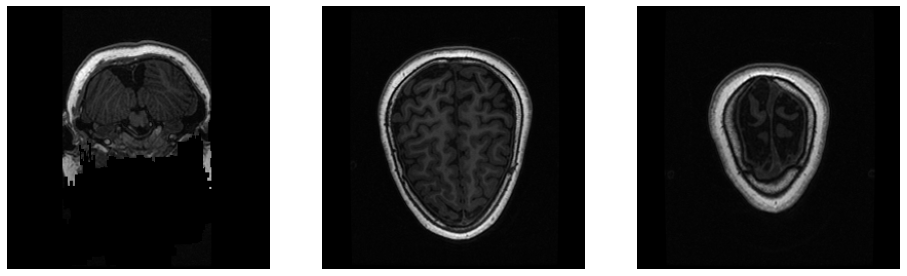

In [21]:
viewPlot(im)

In [22]:
print('[INFOS] Data type             :', im.dtype)
print('[INFOS] Min. intensity value  :', im.min())
print('[INFOS] Mean intensity value  :', np.round(im.mean(),2))
print('[INFOS] Max. intensity value  :', im.max())
print('[INFOS] Size of data          :', im.size)
print('[INFOS] Image data shape      :', im.shape)

[INFOS] Data type             : int16
[INFOS] Min. intensity value  : 0
[INFOS] Mean intensity value  : 535.65
[INFOS] Max. intensity value  : 10106
[INFOS] Size of data          : 10878976
[INFOS] Image data shape      : (166, 256, 256)


[INFOS] Shape of hist     : (10107,)


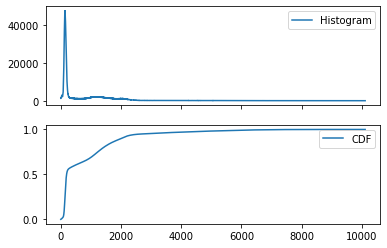

In [23]:
'''---------------------------------------------------------------------------------------
Plot of the histogram and CDF cumulative distribution function.
------------------------------------------------------------------------------------------
'''
# Create a histogram, binned at each possible value
hist = ndi.measurements.histogram(im, min=1, max=10106, bins=10107)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Histogram for the in16 data type
# Plot the histogram and CDF

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
axes[0].legend()
axes[1].legend()

print("[INFOS] Shape of hist     :", hist.shape)

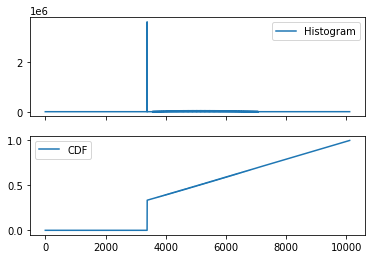

In [24]:
'''---------------------------------------------------------------------------------------
Apply equalization and plot the result
------------------------------------------------------------------------------------------
'''
# Create a histogram, binned at each possible value
hist = ndi.measurements.histogram(im, min=0, max=10106, bins=10107)
# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Histogram for the in16 data type
# Plot the histogram and CDF

imEqualized = cdf[im]*10106

fig, axes = plt.subplots(2, 1, sharex=True)

hE = ndi.measurements.histogram(imEqualized, min=1, max=10106, bins=10107)
cdfE = hE.cumsum() / hE.sum()

axes[0].plot(hE, label='Histogram')
axes[1].plot(cdfE, label='CDF')
axes[0].legend()
axes[1].legend()

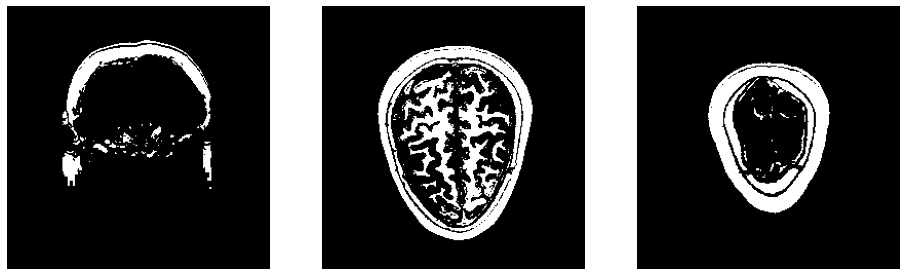

In [25]:
'''---------------------------------------------------------------------------------------
Create a brain mask by removing all non brain tissue.
Screen out non-bone pixels from
------------------------------------------------------------------------------------------
'''
maskHead = im>1200 # mask binary
viewPlot(maskHead)

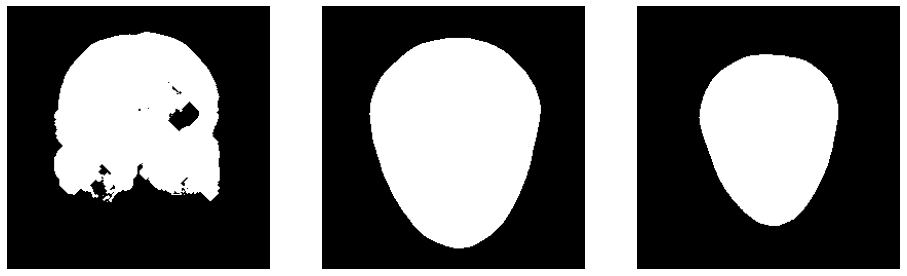

In [26]:
#Create a head mask by removing all non brains tissues.
imHead = np.where(maskHead, im, 0)
imHead = ndi.binary_dilation(imHead, iterations=8)
imHead = ndi.binary_closing(imHead, iterations=8)
viewPlot(imHead)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<bound method Axes.legend of <AxesSubplot:>>

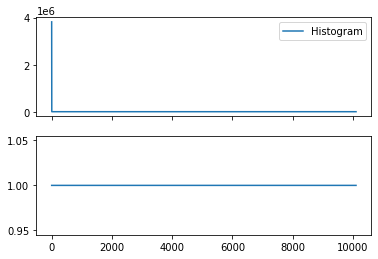

In [27]:
'''---------------------------------------------------------------------------------------
Histogram of the mask
------------------------------------------------------------------------------------------
'''
# Create a histogram, binned at each possible value
h2 = ndi.measurements.histogram(imHead, min=1, max=10106, bins=10107)

# Create a cumulative distribution function
cdf2 = h2.cumsum() / h2.sum()

fig, axes = plt.subplots(2, 1, sharex=True)

axes[0].plot(h2, label='Histogram')
axes[1].plot(cdf2, label='CDF')
axes[0].legend()
axes[1].legend

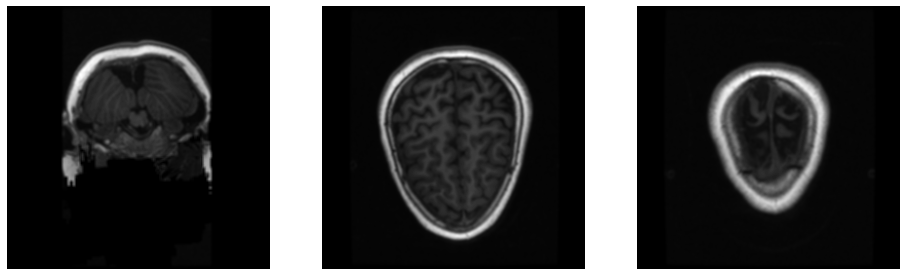

In [28]:
'''---------------------------------------------------------------------------------------
Smoothing of the head with a mean filtering (each element of the kernel is set to 0.11)
------------------------------------------------------------------------------------------
'''

w = 0.11 * np.ones([3, 3, 3])
imFilt = ndi.convolve(im, w)
viewPlot(imFilt)

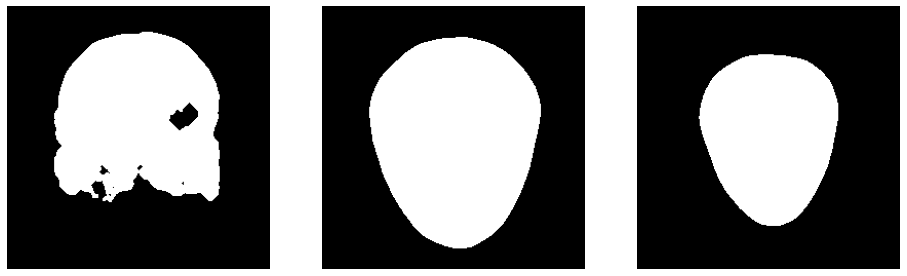

In [29]:
'''---------------------------------------------------------------------------------------
Smoothing of the head with a mean filtering (each element of the kernel is set to 0.11)
------------------------------------------------------------------------------------------
'''

imH = ndi.convolve(imHead, w)
viewPlot(imH)

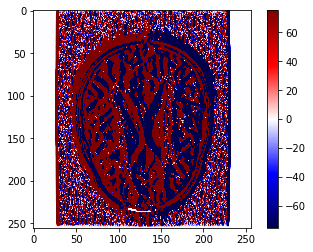

In [30]:
'''---------------------------------------------------------------------------------------
Edge detection
Create a filter to be used as a detector, change of intensity from the left to the right.
Use only 1, 0 and -1 by convolving the image with the detectors.
------------------------------------------------------------------------------------------
'''
k = np.zeros([3, 3, 3])
k[0] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
k[1] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
k[2] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

imEdge = ndi.convolve(im, k)
plt.imshow(imEdge[90], cmap='seismic', vmin=-75, vmax=75);
plt.colorbar();

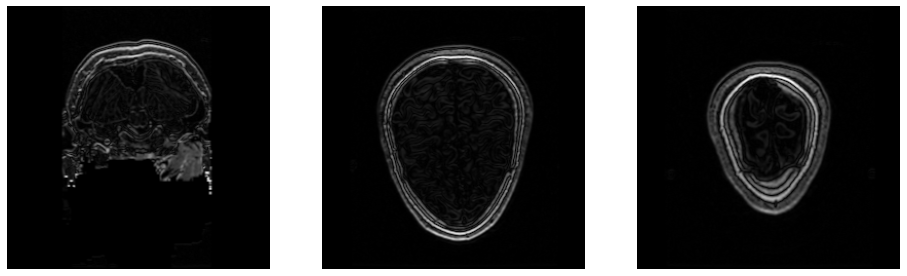

In [62]:
sAx0 = ndi.sobel(im1, axis=0)
sAx1 = ndi.sobel(im1, axis=1)
edges = np.sqrt(np.square(sAx0) + np.square(sAx1))
viewPlot(edges)
print(edges.sh)

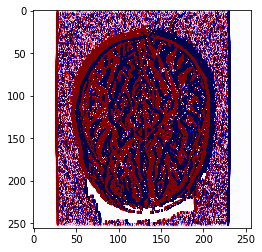

In [76]:
plt.imshow(edges, cmap='seismic', vmin=-75, vmax=75);

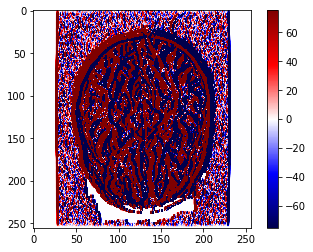

In [68]:
weights = [[1, 0, -1], [1, 0, -1], [1, 0, -1]]

# Convolve "im" with filter weights
edges = ndi.convolve(im[60], weights)

# Draw the image in color
plt.colorbar();